# (Step 3) Model Construction

##  Always find the best classification technique

Shihab {cite}`Shihab2012` and Hall et al. {cite}`hall2012systematic` show that logistic regression and random forests are the two most-popularly-used classification techniques in the literature of software defect prediction, since they are explainable and have built-in model explanation techniques (i.e., the ANOVA analysis for the regression technique and the variable importance analysis for the random forests technique).
Recent studies {cite}`tantithamthavorn2016automated`{cite}`fu2016tuning`{cite}`tantithamthavorn2018optimization` also demonstrate that automated parameter optimisation can improve the performance and stability of defect models.
Using the findings of prior studies to guide our selection, we choose (1) the commonly-used classification techniques that have built-in model-specific explanation techniques (i.e., logistic regression and random forests) and (2) the top-5 classification techniques when performing automated parameter optimisation {cite}`tantithamthavorn2016automated`{cite}`tantithamthavorn2018optimization` (i.e., random forests, C5.0, neural network, GBM, and xGBTree).

<!-- We use the implementation of Logistic Regression as provided by the \texttt{glm} function of the \texttt{stats} R package~\cite{statsRPackage}.
We use the implementation of automated parameter optimisation of Random Forests, C5.0, AVNNet, GBM, and xGBTree as provided by the \texttt{train} function of the \texttt{caret} R package~\cite{kuhn2017caret} with the options of \texttt{rf}, \texttt{C5.0}, \texttt{avNNet}, \texttt{gbm}, and \texttt{xgbTree} for the method parameter, respectively. -->
To determine the best classification technique, we use the Area Under the receiver operator characteristic Curve (AUC) to as a performance indicator to measure the discriminatory power of predictive models, as suggested by recent research {cite}`lessmann2008benchmarking`{cite}`ghotra2015revisiting`{cite}`rahman2013and`.
The axes of the curve of the AUC measure are the coverage of non-defective modules (true negative rate) for the x-axis and the coverage of defective modules (true positive rate) for the y-axis.
The AUC measure is a threshold-independent performance measure that evaluates the ability of models in discriminating between defective and clean instances.
The values of AUC range between 0 (worst), 0.5 (no better than random guessing), and 1 (best) {cite}`Hanley1982-uo`.
We neither re-balance nor normalize our training samples to preserve its original characteristics and to avoid any concept drift for the explanations of defect models{cite}`tantithamthavorn2018impact`.

Below, we provide an example of an interactive code snippet on how to construct and evaluate defect models to find the best classification techniques.


In [29]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split



train_dataset = pd.read_csv(("../../datasets/lucene-2.9.0.csv"), index_col = 'File')
test_dataset = pd.read_csv(("../../datasets/lucene-3.0.0.csv"), index_col = 'File')

outcome = 'RealBug'
features = ['OWN_COMMIT', 'Added_lines', 'CountClassCoupled', 'AvgLine', 'RatioCommentToCode']

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code
features = ['nCommit', 'AddedLOC', 'nCoupledClass', 'LOC', 'CommentToCodeRatio']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [58]:
# Import for Construct Defect Models (Classification)
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forests
from sklearn.tree import DecisionTreeClassifier # C5.0 (Decision Tree)
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Machine (GBM)
import xgboost as xgb # eXtreme Gradient Boosting Tree (xGBTree)

# Import for AUC calculation
from sklearn.metrics import roc_auc_score 

## Construct defect models

# Logistic Regression
lr_model = LogisticRegression(random_state=1234)
lr_model.fit(X_train, y_train)  
lr_model_AUC = round(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]), 3)

# Random Forests
rf_model = RandomForestClassifier(random_state=1234, n_jobs = 10)
rf_model.fit(X_train, y_train)  
rf_model_AUC = round(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]), 3)

# C5.0 (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)  
dt_model_AUC = round(roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]), 3)

# Neural Network
nn_model = MLPClassifier(random_state=1234)
nn_model.fit(X_train, y_train)  
nn_model_AUC = round(roc_auc_score(y_test, nn_model.predict_proba(X_test)[:,1]), 3)

# Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingClassifier(random_state=1234)
gbm_model.fit(X_train, y_train)  
gbm_model_AUC = round(roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:,1]), 3)

# eXtreme Gradient Boosting Tree (xGBTree)
xgb_model = xgb.XGBClassifier(random_state=1234)
xgb_model.fit(X_train, y_train)  
xgb_model_AUC = round(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]), 3)

# Summarise into a DataFrame
model_performance_df = pd.DataFrame(data=np.array([['Logistic Regression', 'Random Forests', 'C5.0 (Decision Tree)', 'Neural Network', 'Gradient Boosting Machine (GBM)', 'eXtreme Gradient Boosting Tree (xGBTree)'],
                            [lr_model_AUC, rf_model_AUC, dt_model_AUC, nn_model_AUC, gbm_model_AUC, xgb_model_AUC]]).transpose(),
             index = range(6),
             columns = ['Model', 'AUC'])
model_performance_df['AUC'] = model_performance_df.AUC.astype(float)
model_performance_df = model_performance_df.sort_values(by = ['AUC'], ascending = False)

[16:28:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jjia0028/opt/anaconda3/envs/xaitools/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jjia0028/opt/anaconda3/envs/xaitools/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


,Model,AUC
1,Random Forests,0.859
5,eXtreme Gradient Boosting Tree (xGBTree),0.822
4,Gradient Boosting Machine (GBM),0.821
3,Neural Network,0.819
0,Logistic Regression,0.799
2,C5.0 (Decision Tree),0.717


<AxesSubplot:ylabel='Model'>

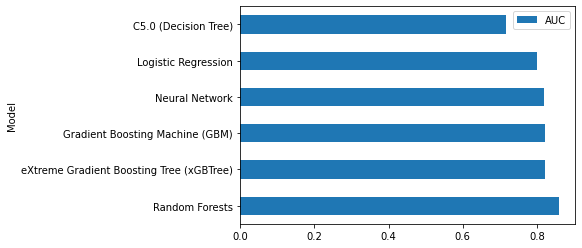

In [64]:
# Visualise the performance of defect models
display(model_performance_df)
model_performance_df.plot(kind = 'barh', y = 'AUC', x = 'Model')


<!-- 
### TODO - Content


## Always optimize hyperparameter settings

### TODO - Content -->

```{note}
Parts of this chapter have been published by Jirayus Jiarpakdee, Chakkrit Tantithamthavorn, Hoa K. Dam, John Grundy:
An Empirical Study of Model-Agnostic Techniques for Defect Prediction Models. IEEE Trans. Software Eng. (2021).
```


### Suggested Readings

[1] Chakkrit Tantithamthavorn, Shane McIntosh, Ahmed E. Hassan, Kenichi Matsumoto: The Impact of Automated Parameter Optimization on Defect Prediction Models. IEEE Trans. Software Eng. 45(7): 683-711 (2019).

[2] Emad Shihab: An Exploration of Challenges Limiting Pragmatic Software Defect Prediction. Queen's University at Kingston, Ontario, Canada, 2012.

[3] Tracy Hall, Sarah Beecham, David Bowes, David Gray, Steve Counsell:
A Systematic Literature Review on Fault Prediction Performance in Software Engineering. IEEE Trans. Software Eng. 38(6): 1276-1304 (2012).